In [2]:
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
df = pd.read_csv("NLP_Dataset1.csv")

In [5]:
df.head(5)

,AssetId,organizationid,organizationcountrycode,locationid,AssetType,AlarmLabel,AlarmMessage,Severity,ActivatedTimestamp,ClearedTimestamp,month,week,ResolutionTimeMinutes,Lemmas_No_Stop_Words,Tokens
0,001e6d91-324b-4b99-84f8-9435148de9ce,5effecae-fdee-494a-bf38-d4cb5d7cc405,US,Default Location,UPS,Battery Near End Of Life Cleared,The battery is no longer near the end of life.,WARNING,2021-01-17T23:32:55Z,2021-03-16T14:37:52Z,1.0,3,82984.950000,"['battery', 'near', 'end', 'life', 'clear']","['battery', 'near', 'end', 'of', 'life', 'clea..."
1,001e6d91-324b-4b99-84f8-9435148de9ce,5effecae-fdee-494a-bf38-d4cb5d7cc405,US,Default Location,UPS,Power Failure Cleared,No longer on battery power.,WARNING,2021-01-08T20:55:56Z,2021-01-08T20:56:19Z,1.0,2,0.383333,"['power', 'failure', 'clear']","['power', 'failure', 'cleared']"
2,004209ba-f692-41b8-af30-5b51996f1abb,a3768a07-4e2d-4075-ab6b-66e3541fc6c4,US,275102b5-af38-456c-982b-7a6d33850e13,UPS,Device Communication Alert,"Communication with the UPS \""redact\"" has been...",CRITICAL,2021-01-08T20:28:05Z,2021-01-08T20:36:14Z,1.0,2,8.150000,"['device', 'communication', 'alert']","['device', 'communication', 'alert']"
3,004209ba-f692-41b8-af30-5b51996f1abb,a3768a07-4e2d-4075-ab6b-66e3541fc6c4,US,275102b5-af38-456c-982b-7a6d33850e13,UPS,Device Communication Alert,"Communication with the UPS \""redact\"" has been...",CRITICAL,2021-01-29T11:51:23Z,2021-01-29T11:56:16Z,1.0,5,4.883333,"['device', 'communication', 'alert']","['device', 'communication', 'alert']"
4,004209ba-f692-41b8-af30-5b51996f1abb,a3768a07-4e2d-4075-ab6b-66e3541fc6c4,US,275102b5-af38-456c-982b-7a6d33850e13,UPS,Device Communication Alert,"Communication with the UPS \""redact\"" has been...",CRITICAL,2021-01-29T09:41:23Z,2021-01-29T09:46:22Z,1.0,5,4.983333,"['device', 'communication', 'alert']","['device', 'communication', 'alert']"


In [7]:
def clean_lemmas(lemmas):
    return ' '.join(lemmas).replace(' ', '')

# Apply the cleaning function to join lemmas into a single string per row
df['Text'] = df['Lemmas_No_Stop_Words'].apply(clean_lemmas)

# Extract unique values of Lemmas_No_Stop_Words
unique_texts = df['Text'].unique()

# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words=None)

# Fit the model and transform the unique texts
bow_matrix = vectorizer.fit_transform(unique_texts)

# Get feature names to use as DataFrame column headers
bow_feature_names = vectorizer.get_feature_names()

# Convert BoW matrix to a DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_feature_names)

# Display the resulting Bag of Words DataFrame
print(bow_df.head())

   00  0004446  00124b00011ffe0e  00124b00011fff3e  00c0b700008279f1  \
0   0        0                 0                 0                 0   
1   0        0                 0                 0                 0   
2   0        0                 0                 0                 0   
3   0        0                 0                 0                 0   
4   0        0                 0                 0                 0   

   00c0b70000827a01  00c0b70000828bec  00c0b70000d94826  00c0b70000dcf549  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   00c0b70000dd58f9  ...  электропитания  范围阈值  警报状态阈值  通信状态阈值  범위  불일치  상태  \
0                 0  ... 

In [9]:
bow_df

,00,0004446,00124b00011ffe0e,00124b00011fff3e,00c0b700008279f1,00c0b70000827a01,00c0b70000828bec,00c0b70000d94826,00c0b70000dcf549,00c0b70000dd58f9,...,электропитания,范围阈值,警报状态阈值,通信状态阈值,범위,불일치,상태,임계값,최대값,통신
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_feature_names)
def is_english_or_number(s):
    return re.fullmatch(r'[A-Za-z0-9]+', s) is not None

filtered_columns = [col for col in bow_df.columns if is_english_or_number(col)]
filtered_bow_df = bow_df[filtered_columns]

print(filtered_bow_df.head())

   00  0004446  00124b00011ffe0e  00124b00011fff3e  00c0b700008279f1  \
0   0        0                 0                 0                 0   
1   0        0                 0                 0                 0   
2   0        0                 0                 0                 0   
3   0        0                 0                 0                 0   
4   0        0                 0                 0                 0   

   00c0b70000827a01  00c0b70000828bec  00c0b70000d94826  00c0b70000dcf549  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   00c0b70000dd58f9  ...  z7  z8  za1025011198  za1121029019  za1121031117  \
0                 0  ...  

In [7]:
words_list = list(filtered_bow_df.columns)

In [8]:
import pandas as pd
import nltk
import re
nltk.download('words')
from nltk.corpus import words

[nltk_data] Downloading package words to
[nltk_data]     /home/patil.anjali/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [9]:
import pandas as pd
from nltk.corpus import words

# Download the words corpus if you haven't already
import nltk
nltk.download('words')

# List of English words
english_words = set(words.words())

# Filtering function
def is_english_word(word):
    return word.lower() in english_words

# Apply the filter
filtered_columns1 = [col for col in bow_df.columns if is_english_word(col)]
filtered_bow_df1 = bow_df[filtered_columns1]

# Display the filtered DataFrame
filtered_bow_df1


[nltk_data] Downloading package words to
[nltk_data]     /home/patil.anjali/nltk_data...
[nltk_data]   Package words is already up-to-date!


,aa,abnormal,abort,absent,accept,acceptable,access,ach,acknowledge,acquire,...,wireless,wiring,work,worth,wrong,yak,year,yellow,york,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Filtering function
def is_english_word(word):
    return word.lower() in english_words

# Apply the filter
filtered_columns1 = [col for col in bow_df.columns if is_english_word(col)]
filtered_bow_df1 = bow_df[filtered_columns]
filtered_bow_df1

,00,0004446,00124b00011ffe0e,00124b00011fff3e,00c0b700008279f1,00c0b70000827a01,00c0b70000828bec,00c0b70000d94826,00c0b70000dcf549,00c0b70000dd58f9,...,z7,z8,za1025011198,za1121029019,za1121031117,zadaj,zeitschwellenwert,zigbee,zone,zustandskonflikt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the data
tfidf_matrix = vectorizer.fit_transform(filtered_bow_df)

# Create a DataFrame to view the TF-IDF results
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names())

print(tfidf_df)

       00  0004446  00124b00011ffe0e  00124b00011fff3e  00c0b700008279f1  \
0     1.0      0.0               0.0               0.0               0.0   
1     0.0      1.0               0.0               0.0               0.0   
2     0.0      0.0               1.0               0.0               0.0   
3     0.0      0.0               0.0               1.0               0.0   
4     0.0      0.0               0.0               0.0               1.0   
...   ...      ...               ...               ...               ...   
2660  0.0      0.0               0.0               0.0               0.0   
2661  0.0      0.0               0.0               0.0               0.0   
2662  0.0      0.0               0.0               0.0               0.0   
2663  0.0      0.0               0.0               0.0               0.0   
2664  0.0      0.0               0.0               0.0               0.0   

      00c0b70000827a01  00c0b70000828bec  00c0b70000d94826  00c0b70000dcf549  \
0      

In [12]:
# Aggregate the maximum TF-IDF scores for each term
max_tfidf_scores = tfidf_df.max(axis=0)

In [13]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [14]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [15]:
text = ' '.join(words_list)
# Convert the string to bytes using UTF-8 encoding
text_bytes = text.encode('utf-8')

# Now 'text_bytes' is a bytes-like object
print(text_bytes)

b'00 0004446 00124b00011ffe0e 00124b00011fff3e 00c0b700008279f1 00c0b70000827a01 00c0b70000828bec 00c0b70000d94826 00c0b70000dcf549 00c0b70000dd58f9 01 02 03 04 05 06 07 08 09 0r069 10 100 1000uxi 100vac 101 102 103 104 105 106 107 108 109 10a 10b 10min 10v 11 110 111 112 113 114 1144 115 115v 116 117 118 119 11b 12 120 120v 121 122dc 122dce 122dcx 12amps 12b 12th 13 132 133 135 135v 136 137 138 139 13a 14 140 141 142 143 144 145 146 147 148 149 15 150 151 152 153 154 155 155dc 155dcx 155vlze 155vlzf 155vlzm 156 157 158 159 15a 15l 15min 15r 15s 16 160 161 162 163 164 165 166 167 168 169 16kva 17 170 171 172 173 174 175 176 177 178 179 18 180 1800 181 182 183 184 185 188 18th 19 19593 198 1a 1b 1e 1f 1h 1min 1st 1w 20 200 2000 201 202 203 204 205 206 207 208 209 20l 20r 20thdc 20thvlzd 20thvlze 20thvlzf 20thvlzm 20v 21 210 210v 211 22 220 2200 220v 222 225 228 2280192 229 22l 22r 23 24 240 24a 25 250 252 25c 26 260 261 262 263 264 265 26c 27 27c 28 28c 28deg 29 2a 2b 2hour 2hrs 2n 2nd 

In [16]:
pip install --upgrade Pillow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
# Check for any empty strings in the Text column
df['Text'] = df['Text'].replace('', np.nan)
df.dropna(subset=['Text'], inplace=True)

# Extract unique values of Text
unique_texts = df['Text'].unique()

# Initialize the CountVectorizer for unigrams and bigrams
vectorizer = CountVectorizer(stop_words=None, ngram_range=(1, 2))

# Fit the model and transform the unique texts
bow_matrix = vectorizer.fit_transform(unique_texts)

# Get feature names to use as DataFrame column headers
bow_feature_names = vectorizer.get_feature_names()

# Convert BoW matrix to a DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_feature_names)

# Filtering to keep only English words or numbers
def is_english_or_number(s):
    return re.fullmatch(r'[A-Za-z0-9]+', s) is not None

filtered_columns = [col for col in bow_df.columns if is_english_or_number(col)]
filtered_bow_df = bow_df[filtered_columns]

# Download the words corpus if you haven't already
nltk.download('words')
# List of English words
english_words = set(words.words())

# Filtering function
def is_english_word(word):
    return word.lower() in english_words

# Apply the filter to keep only valid English words
filtered_columns_english = [col for col in filtered_bow_df.columns if is_english_word(col)]
filtered_bow_df_english = filtered_bow_df[filtered_columns_english]

# Display the resulting Bag of Words DataFrame
print(filtered_bow_df_english.head())

# Using TF-IDF
vectorizer_tfidf = TfidfVectorizer(ngram_range=(1, 2))
tfidf_matrix = vectorizer_tfidf.fit_transform(unique_texts)
tfidf_feature_names = vectorizer_tfidf.get_feature_names()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)

# Aggregate the maximum TF-IDF scores for each term
max_tfidf_scores = tfidf_df.max(axis=0)

[nltk_data] Downloading package words to
[nltk_data]     /home/patil.anjali/nltk_data...
[nltk_data]   Package words is already up-to-date!


   aa  abnormal  abort  absent  accept  acceptable  access  ach  acknowledge  \
0   0         0      0       0       0           0       0    0            0   
1   0         0      0       0       0           0       0    0            0   
2   0         0      0       0       0           0       0    0            0   
3   0         0      0       0       0           0       0    0            0   
4   0         0      0       0       0           0       0    0            0   

   acquire  ...  wireless  wiring  work  worth  wrong  yak  year  yellow  \
0        0  ...         0       0     0      0      0    0     0       0   
1        0  ...         0       0     0      0      0    0     0       0   
2        0  ...         0       0     0      0      0    0     0       0   
3        0  ...         0       0     0      0      0    0     0       0   
4        0  ...         0       0     0      0      0    0     0       0   

   york  zone  
0     0     0  
1     0     0  
2     0     0 

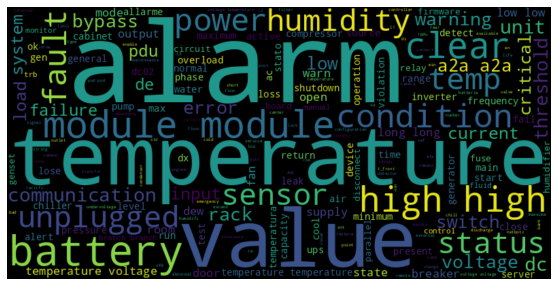

In [19]:
# WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(tfidf_feature_names)
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
# Tokenize text for Word2Vec
tokenized_texts = [word_tokenize(text.lower()) for text in unique_texts]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Function to compute average Word2Vec for a document
def average_word2vec(doc, model):
    vectors = [model.wv[word] for word in doc if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Compute average Word2Vec for each document
avg_word2vec_vectors = np.array([average_word2vec(doc, word2vec_model) for doc in tokenized_texts])

# Convert to DataFrame
avg_word2vec_df = pd.DataFrame(avg_word2vec_vectors)

# Display the resulting Average Word2Vec DataFrame
print(avg_word2vec_df.head())

         0         1         2         3         4         5         6   \
0  1.131882 -1.112297 -0.895717 -0.479524  0.248030  0.009155 -0.811121   
1  1.147613 -1.073981 -0.889017 -0.445074  0.148838 -0.079818 -0.726918   
2  0.956950 -0.914307 -0.834845 -0.419467  0.379724 -0.053111 -0.693755   
3  1.013366 -0.964159 -0.888843 -0.502006  0.243339 -0.083496 -0.785176   
4  1.168896 -1.165287 -0.926978 -0.413224  0.283795  0.088320 -0.647731   

         7         8         9   ...        90        91        92        93  \
0 -0.785537 -1.224751  0.391713  ...  0.298538  0.066191  0.411310 -0.303183   
1 -0.655365 -1.202394  0.287065  ...  0.182182  0.099044  0.379204 -0.341884   
2 -0.626562 -1.073162  0.380995  ...  0.214279  0.125470  0.430262 -0.347797   
3 -0.689390 -1.172950  0.363309  ...  0.198170  0.088842  0.417333 -0.360397   
4 -0.720038 -1.135015  0.381288  ...  0.135794  0.131243  0.427127 -0.388765   

         94        95        96        97        98        99  
0 -0

In [21]:
# Save the preprocessed data
filtered_bow_df_english.to_csv("filtered_bow_df_english.csv", index=False)
tfidf_df.to_csv("tfidf_df.csv", index=False)
# Convert to DataFrame
avg_word2vec_df = pd.DataFrame(avg_word2vec_vectors)
avg_word2vec_df.to_csv("avg_word2vec_df.csv", index=False)